<h1 align='center'> Beginner Olympic games Data Analysis <h1>


# Data used:
The data used to illustrate Plotly features encompasses 120 years of history of Olympic Games. 
We will explore this data with the purpose to illustrate primarly the plotly features.


# Analysis:
A simple analysis for those who start with data analysis in python.
Different types of charts are made using a few variables and columns.

**Loading the dataset:**

**Data Cleaning:** 
 
**Data Visualization:** 



#####  Importing Libraries

In [72]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#from bubbly.bubbly import bubbleplot 
#from __future__ import division
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)



##### Loading the dataset

In [73]:
athlete_events_df = pd.read_csv("athlete_events.csv")
noc_regions_df = pd.read_csv("noc_regions.csv")

##### Loading the dataset

In [74]:
df = pd.read_csv('athlete_events.csv')
df.head(5)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
noc_regions_df.head(5)

##### Check for NULL Values

In [43]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(athlete_events_df)

,Total,Percent
Medal,231333,85.326207
Weight,62875,23.191180
Height,60171,22.193821
Age,9474,3.494445
ID,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Team,0,0.000000
NOC,0,0.000000
Games,0,0.000000


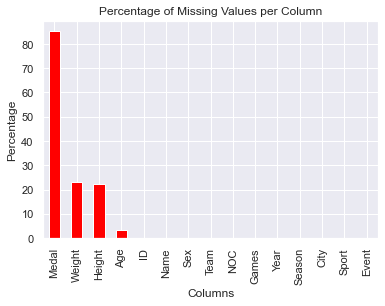

In [31]:
fig=plt.figure()
# Obtain missing data information
missing = missing_data(athlete_events_df)

# Create bar chart
missing['Percent'].plot(kind='bar', color='red')

# Add titles and labels
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage')
fig.set_facecolor("white")

# Show the chart
plt.show()

##### Number of Sports in every Olympic Games

In [40]:
import plotly.graph_objs as go
import pandas as pd

# Group the dataframe by year, city, and season
tmp = athlete_events_df.groupby(['Year', 'City','Season'])['Sport'].nunique()
df = pd.DataFrame(data={'Sports': tmp.values}, index=tmp.index).reset_index()

# Split the dataframe into summer and winter events
summer_events_df = df[df['Season']=='Summer']
winter_events_df = df[df['Season']=='Winter']

# Create an empty list to store the traces
data = []

# Loop through the summer and winter events
for season, season_df in [("Summer", summer_events_df), ("Winter", winter_events_df)]:
    if season == 'Summer':
        color = 'rgb(0, 255, 0)' # Green color
    else:
        color = 'rgb(0, 0, 255)' # Blue color
    trace = go.Bar(
        x=season_df['Year'],
        y=season_df['Sports'],
        name=f"{season} Games",
        text=season_df['City'],
        marker=dict(
            color=color,
            line=dict(
                color='black',
                width=1
            ),
            opacity=0.5
        )
    )
    data.append(trace)

# Create the layout for the plot
layout = dict(
    title=dict(text='Sports in every Olympic Games', x=0.5, xref='paper', font=dict(size=28)),
    xaxis=dict(title='Year', showticklabels=True),
    yaxis=dict(title='Number of sports'),
    hovermode='closest',
    barmode='stack',
    titlefont=dict(size=24),

)

# Create the figure
fig = dict(data=data, layout=layout)

# Plot the figure
iplot(fig, filename="JJOO")

##### Histogram of number of athletes in summer Olympics

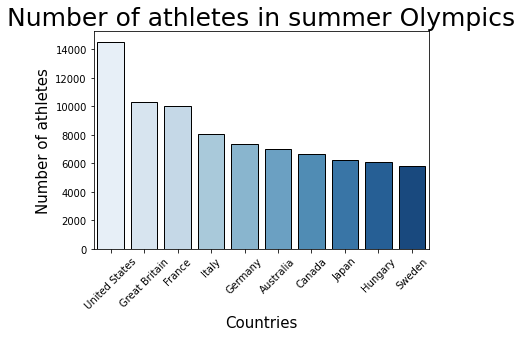

In [44]:
#filter the dataframe by Season
df_Winter = df.loc[df["Season"] == "Summer"]

#create histogram of top 10 teams
fig=plt.figure()
sns.countplot(x='Team', data=df_Winter, order=df_Winter['Team'].value_counts().nlargest(10).index,palette='Blues',edgecolor='black')
plt.xticks(rotation=45)
fig.set_facecolor("white")
plt.xlabel('Countries', color='black', fontsize=15)
plt.ylabel('Number of athletes', color='black', fontsize=15)
plt.title("Number of athletes in summer Olympics", color='black', fontsize=25)
plt.show()

##### Histogram of number of athletes in winter Olympics

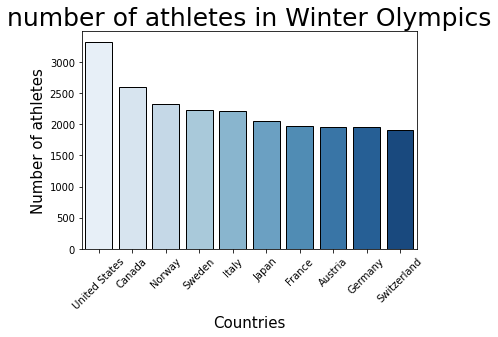

In [34]:

#filter the dataframe by Season
df_Winter = df.loc[df["Season"] == "Winter"]

#create histogram of top 10 teams
fig=plt.figure()
sns.countplot(x='Team', data=df_Winter, order=df_Winter['Team'].value_counts().nlargest(10).index,palette='Blues',edgecolor='black')
plt.xticks(rotation=45)
fig.set_facecolor("white")
plt.xlabel('Countries', color='black', fontsize=15)
plt.ylabel('Number of athletes', color='black', fontsize=15)
plt.title("number of athletes in Winter Olympics", color='black', fontsize=25)
plt.show()

##### Histogram of number of athletes in winter Olympics

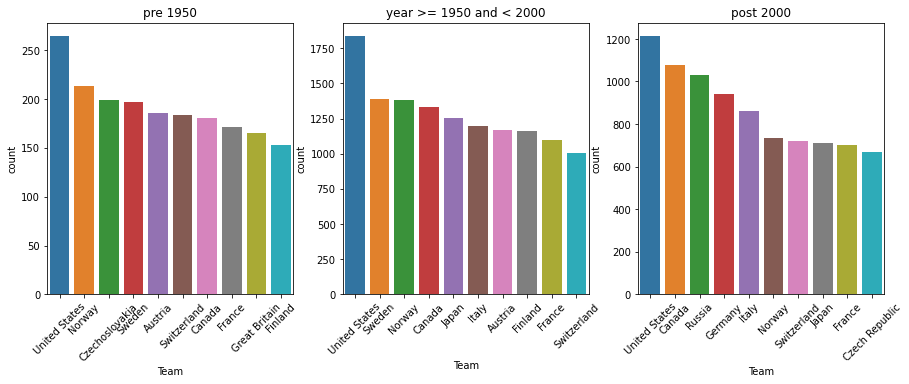

In [107]:
import seaborn as sns

#filter the dataframe by Season
df_Winter = df.loc[df["Season"] == "Winter"]

#create a subplot with 3 histograms
fig, axs = plt.subplots(1, 3, figsize=(15,5))

#create a histogram of top 10 teams with year < 1949
df_Winter_1949 = df_Winter.loc[df_Winter["Year"] < 1949]
team_counts_1949 = df_Winter_1949['Team'].value_counts(normalize="true").head(10)

sns.countplot(x = "Team", data = df_Winter_1949, order = team_counts_1949.index, ax = axs[0])
axs[0].set_title("pre 1950")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

#create a histogram of top 10 teams with year >= 1950 and < 2000
df_Winter_1999 = df_Winter.loc[(df_Winter["Year"] >= 1950) & (df_Winter["Year"] < 2000)]
team_counts_1999 = df_Winter_1999['Team'].value_counts(normalize="true").head(10)

sns.countplot(x = "Team", data = df_Winter_1999, order = team_counts_1999.index, ax = axs[1])
axs[1].set_title("year >= 1950 and < 2000")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

#create a histogram of top 10 teams with year >= 2000
df_Winter_2020 = df_Winter.loc[df_Winter["Year"] >= 2000]
team_counts_2020 = df_Winter_2020['Team'].value_counts(normalize="true").head(10)

sns.countplot(x = "Team", data = df_Winter_2020, order = team_counts_2020.index, ax = axs[2])
axs[2].set_title("post 2000")
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45)

fig.set_facecolor("white")
plt.show()


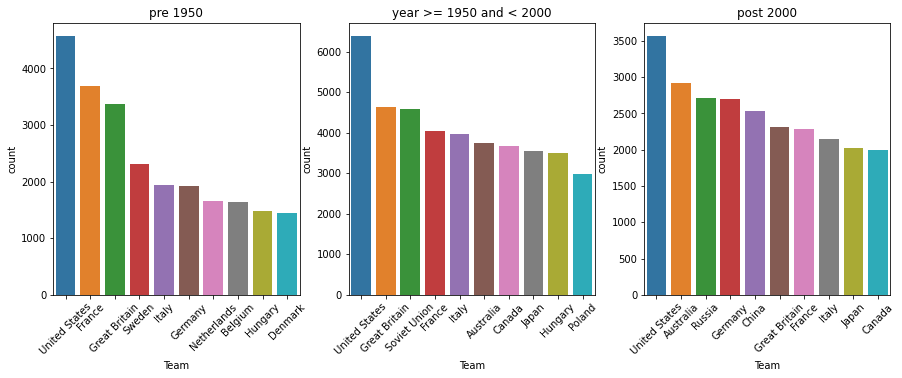

In [108]:
import seaborn as sns

#filter the dataframe by Season
df_Winter = df.loc[df["Season"] == "Summer"]

#create a subplot with 3 histograms
fig, axs = plt.subplots(1, 3, figsize=(15,5))

#create a histogram of top 10 teams with year < 1949
df_Winter_1949 = df_Winter.loc[df_Winter["Year"] < 1949]
team_counts_1949 = df_Winter_1949['Team'].value_counts(normalize="true").head(10)

sns.countplot(x = "Team", data = df_Winter_1949, order = team_counts_1949.index, ax = axs[0])
axs[0].set_title("pre 1950")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

#create a histogram of top 10 teams with year >= 1950 and < 2000
df_Winter_1999 = df_Winter.loc[(df_Winter["Year"] >= 1950) & (df_Winter["Year"] < 2000)]
team_counts_1999 = df_Winter_1999['Team'].value_counts(normalize="true").head(10)

sns.countplot(x = "Team", data = df_Winter_1999, order = team_counts_1999.index, ax = axs[1])
axs[1].set_title("year >= 1950 and < 2000")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

#create a histogram of top 10 teams with year >= 2000
df_Winter_2020 = df_Winter.loc[df_Winter["Year"] >= 2000]
team_counts_2020 = df_Winter_2020['Team'].value_counts(normalize="true").head(10)

sns.countplot(x = "Team", data = df_Winter_2020, order = team_counts_2020.index, ax = axs[2])
axs[2].set_title("post 2000")
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45)

fig.set_facecolor("white")
plt.show()

In [6]:
tmp = athlete_events_df.groupby(['Season'])['Sport'].value_counts()
df = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()
df.head(5)

,Season,Sport,Athlets
0,Summer,Athletics,38624
1,Summer,Gymnastics,26707
2,Summer,Swimming,23195
3,Summer,Shooting,11448
4,Summer,Cycling,10859


In [ ]:
##### Color

In [10]:
colors = ['rgb(0, 0, 125)', 'rgb(0, 0, 150)', 'rgb(0, 0, 170)', 'rgb(0, 0, 190)', 'rgb(0, 0, 210)', 'rgb(0, 0, 220)', 'rgb(0, 0, 240)', 'rgb(0, 0, 260)', 'rgb(0, 0, 280)', 'rgb(0, 0, 300)']


In [ ]:
##### Top 10 sports with the highest number of athletes in Summer Olympics

In [11]:
df_S = df[df['Season']=='Summer']
df_S = df_S.sort_values(by='Athlets', ascending=False).head(10)
trace = go.Bar(x=df_S['Sport'], 
               y=df_S['Athlets'],
               hoverinfo='x+y', 
               textfont=dict(size=8),
               marker=dict(color=colors,
                           line=dict(color='Blue', width=1))
            )
data = [trace]
layout = dict(title = "Number of athlets per Sport (Summer Olympics)",
              xaxis=dict(title='Sport'),
              yaxis=dict(title='Athletes'),
              width=800,
              height=600,
              margin = dict(l = 50, r = 50, b = 100, t = 100, pad = 4)
             )
fig = dict(data=data,layout=layout)
iplot(fig, filename='styled_bar_chart')

##### Top 10 sports with the highest number of athletes in Winter Olympics

In [7]:
df_S = df[df['Season']=='Winter']
df_S = df_S.sort_values(by='Athlets', ascending=False).head(10)
trace = go.Bar(x=df_S['Sport'], 
               y=df_S['Athlets'],
               hoverinfo='x+y', 
               textfont=dict(size=8),
               marker=dict(color=colors,
                           line=dict(color='Blue', width=1))
            )
data = [trace]
layout = dict(title = "Number of athlets per team (Winter Olympics)",
              xaxis=dict(title='Sport'),
              yaxis=dict(title='Athletes'),
              width=800,
              height=600,
              margin = dict(l = 50, r = 50, b = 100, t = 100, pad = 4)
             )
fig = dict(data=data,layout=layout)
iplot(fig, filename='styled_bar_chart')

##### Top 10 sports with the highest number of athletes in Winter Olympics

##### Athletes per Olympic Game with matplotlib

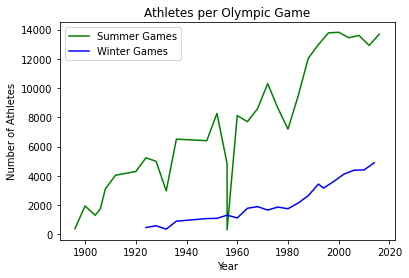

In [8]:

tmp = athlete_events_df.groupby(['Year', 'City'])['Season'].value_counts()
df = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()

dfS = df[df['Season']=='Summer']
dfW = df[df['Season']=='Winter']
fig=plt.figure()

plt.plot(dfS['Year'], dfS['Athlets'], 'g-', label="Summer Games")
plt.plot(dfW['Year'], dfW['Athlets'], 'b-', label="Winter Games")
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Athletes per Olympic Game')
plt.legend(loc='best')
fig.set_facecolor("white")
plt.show()

In [ ]:
##### Athletes per Olympic Game with Seaborn

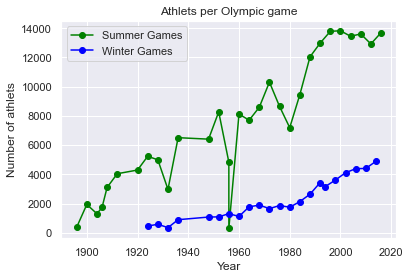

In [36]:
plt.style.use('ggplot')
sns.set(style="darkgrid")

JJOO = athlete_events_df.groupby(['Year', 'City'])['Season'].value_counts()
df = pd.DataFrame(data={'Athlets': JJOO.values}, index=JJOO.index).reset_index()

dfS = df[df['Season']=='Summer']; dfW = df[df['Season']=='Winter']

plt.plot(dfS['Year'], dfS['Athlets'], marker='o', label='Summer Games', color='Green')
plt.plot(dfW['Year'], dfW['Athlets'], marker='o', label='Winter Games', color='Blue')
plt.title('Athlets per Olympic game')
plt.xlabel('Year')
plt.ylabel('Number of athlets')
plt.legend()
plt.show()

In [9]:

traceS = go.Scatter(
    x = dfS['Year'],y = dfS['Athlets'],
    name="Summer Games",
    marker=dict(color="Green"),
    mode = "markers+lines",
    text=dfS['City'],
)
traceW = go.Scatter(
    x = dfW['Year'],y = dfW['Athlets'],
    name="Winter Games",
    marker=dict(color="Blue"),
    mode = "markers+lines",
    text=dfW['City']
)

data = [traceS, traceW]

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Number athlets: Summer Games', 'Number athlets: Winter Games'))
fig.append_trace(traceS, 1, 1)
fig.append_trace(traceW, 1, 2)

iplot(fig, filename="JJOO")

c:\Users\rodri\miniconda3\envs\coder\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



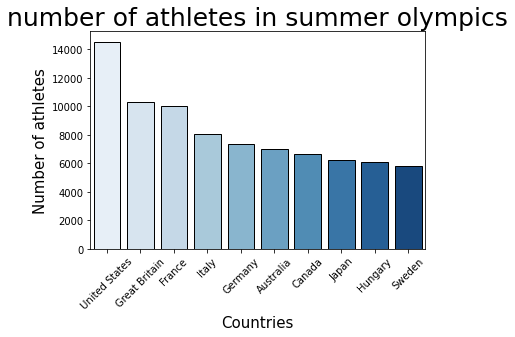

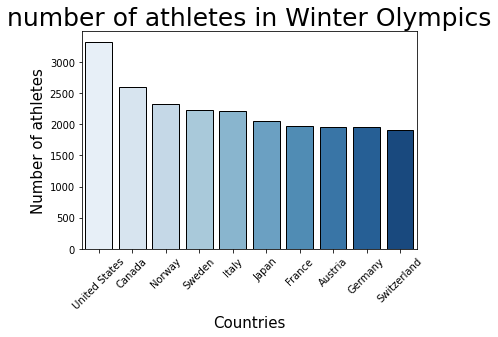